# Supervised Learning

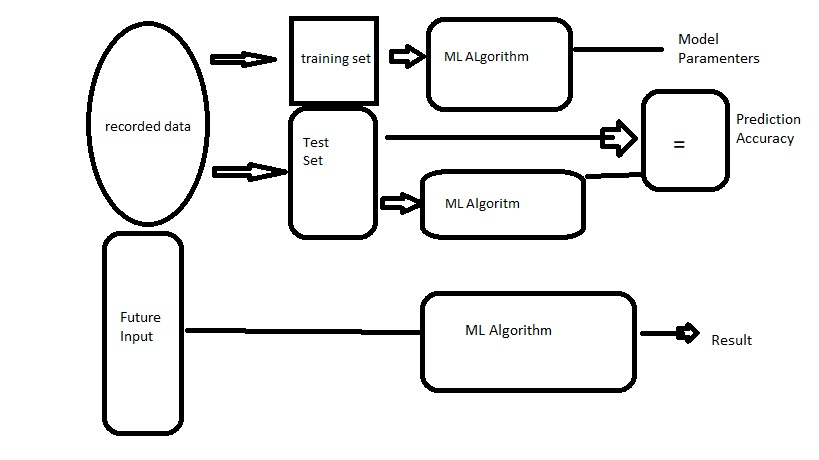

In [1]:
from IPython.display import Image
Image(filename='data/ML.jpg') 

# SKLEARN

## Linear Regression

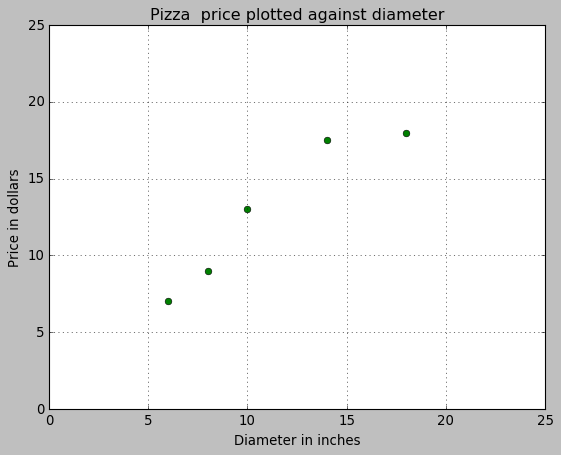

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
psize=[[6],[8],[10],[14],[18]]
pprice=[[7],[9],[13],[17.5],[18]]
plt.figure()
plt.title("Pizza  price plotted against diameter")
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(psize,pprice,"go")
plt.axis([0,25,0,25])
plt.grid(alpha=1)

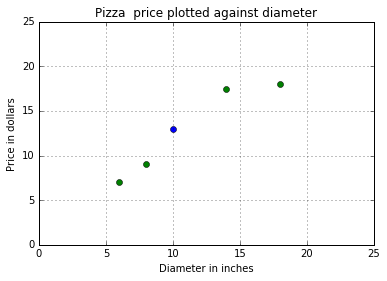

In [3]:
from sklearn.model_selection import train_test_split
psize_train,psize_test,pprice_train,pprice_test=\
train_test_split(psize,pprice,test_size=0.2,random_state=2)

plt.figure()
plt.title("Pizza  price plotted against diameter")
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(psize_train,pprice_train,"go")
plt.plot(psize_test,pprice_test,"bo")
plt.axis([0,25,0,25])
plt.grid(alpha=1)

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(psize_train,pprice_train)
print(pprice_test)
print(model.predict(psize_test))

[[13]]
[[11.37912088]]


In [5]:
print(model.predict([[0],[5],[10]]))

[[ 1.40659341]
 [ 6.39285714]
 [11.37912088]]


[[13]]
[[11.37912088]]


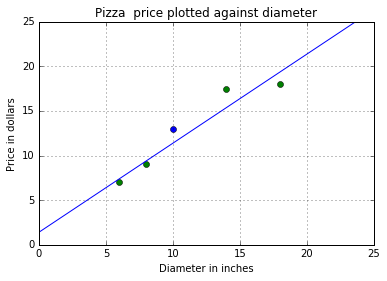

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

psize_train,psize_test,pprice_train,pprice_test=\
train_test_split(psize,pprice,test_size=0.2)

plt.figure()
plt.title("Pizza  price plotted against diameter")
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(psize_train,pprice_train,"go")
plt.plot(psize_test,pprice_test,"bo")
plt.axis([0,25,0,25])
plt.grid(alpha=1)

model = LinearRegression()
model.fit(psize_train,pprice_train)
print(pprice_test)
print(model.predict(psize_test))
plt.plot([0,25],[model.predict([[0]])[0][0],model.predict([[25]])[0][0]])

In [7]:
print("slope(m): %.2f,Intercept (c): %.2f"%(model.coef_,model.intercept_))

slope(m): 1.00,Intercept (c): 1.41


# MEAN SQUARE ERROR AND R^2 COEFF

In [8]:
model.score(psize,pprice) #r^2 coeff


0.9041763136695982

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2=r2_score(pprice,model.predict(psize))
print(r2)
mse =mean_squared_error(pprice,model.predict(psize))
mse

0.9041763136695982


1.8628124622630104

# SGD uses SUM of Squared Errors


# Stochastic Gradient Descent

In [10]:
import numpy as np
X=[6,8,10,14,18]
X= np.array(X).reshape(-1,1)
Y=[7,9,13,17.5,18]
Y= np.array(Y)
print(X)
print(Y)

[[ 6]
 [ 8]
 [10]
 [14]
 [18]]
[ 7.   9.  13.  17.5 18. ]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

psize_train,psize_test,pprice_train,pprice_test=\
train_test_split(psize,pprice,test_size=0.2)


m2 = SGDRegressor(loss="squared_loss",max_iter=1000)
m2.fit(X,Y)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

slope(m): 0.95,Intercept (c): 0.17


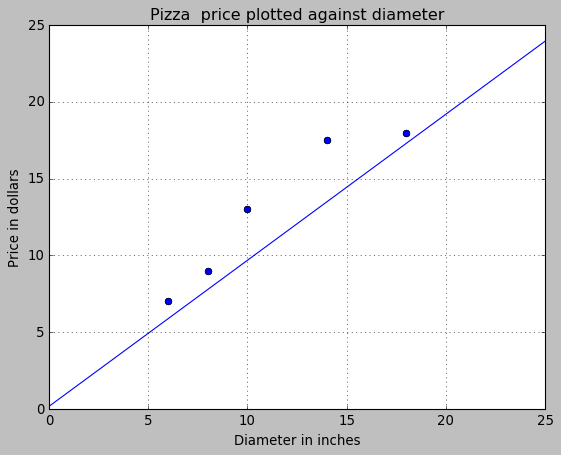

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
plt.figure()
plt.title("Pizza  price plotted against diameter")
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X,Y,"go")
plt.plot(X,Y,"bo")
plt.axis([0,25,0,25])
plt.grid(alpha=1)
#regession line:::
plt.plot([0,25],[m2.predict([[0]])[0],m2.predict([[25]])[0]])
print("slope(m): %.2f,Intercept (c): %.2f"%(m2.coef_,m2.intercept_))

In [13]:
m2.predict([[0]])[0]

0.17285376243075

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2=r2_score(Y,m2.predict(X))# This should Have arguements as actual output to the predicted output
print(r2)
print(m2.score(X,Y))
mse =mean_squared_error(Y,m2.predict(X))
mse

0.6871028322749186
0.6871028322749186


6.082720940575579